In [1]:
import matplotlib as mpl
# Use the pgf backend (must be set before pyplot imported)
# mpl.use('pgf')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# from https://jwalton.info/Matplotlib-latex-PGF/
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [3]:
# Width of the LaTeX document
width = 418


plt.style.use('seaborn-colorblind')


tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 11,
    "font.size": 11
}
plt.rcParams.update(tex_fonts)


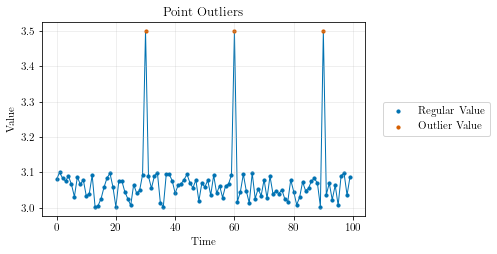

In [11]:
# Point Outlier plot
point_outlier_df = pd.DataFrame({
    'values': np.random.rand(100)*0.1 + 3,
    'outliers': [np.nan] * 100
})
point_outlier_df['idx'] = point_outlier_df.index
outlier_idxs = [30, 60, 90]
point_outlier_df.loc[point_outlier_df['idx'].isin(outlier_idxs), 'values'] = np.nan
point_outlier_df.loc[point_outlier_df['idx'].isin(outlier_idxs), 'outliers'] = 3.5
point_outlier_df['line_vals'] = point_outlier_df.apply(lambda row: row['values'] if not np.isnan(row['values']) else row['outliers'], axis=1) 
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
plt.plot(point_outlier_df['idx'], point_outlier_df['line_vals'], linewidth=1, zorder=-1)
plt.scatter(point_outlier_df['idx'], point_outlier_df['values'], label='Regular Value', s=10)
plt.scatter(point_outlier_df['idx'], point_outlier_df['outliers'], c='C2', label='Outlier Value', s=10, cmap='seaborn-colorblind')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Point Outliers')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc='center left')
plt.grid(alpha=0.25)
fig.savefig('./pdfs/point_outliers.pdf', format='pdf', bbox_inches='tight')
